In [1]:
from scipy.optimize import Bounds, NonlinearConstraint, LinearConstraint
from algorithms import Projector, GD, GDA
import numpy as np
import autograd.numpy as anp
import matplotlib.pyplot as plt

In [2]:
def f(x):
    x1, x2, x3, x4 = x
    numerator = anp.exp(anp.abs(x2 - 3.0)) - 30.0
    denominator = x1**2 + x3**2 + 2.0 * x4**2 + 4.0
    return numerator / denominator

def g1_fun(x):
    x1, _, x3, x4 = x
    return (x1 + x3)**3 + 2.0 * x4**2

def g2_fun(x):
    return (x[1] - 1.0)**2

A = np.array([[2.0, 4.0, 1.0, 0.0]])

constraints = [
    NonlinearConstraint(g1_fun, lb=-np.inf, ub=10.0),
    NonlinearConstraint(g2_fun, lb=0.0, ub=1.0),
    LinearConstraint(A, lb=-1.0, ub=-1.0),
]

bounds = Bounds([-np.inf, -np.inf, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf])
projector = Projector(bounds=bounds, constraints=constraints)

In [3]:
x0s = [np.array([1.0, 2.0]), np.array([2.0, 0.8]), np.array([1.5, 1.8])]

In [4]:
x0s = [
    np.array([ 0.5,  1.8, -2.7,  0.5]),
    np.array([-2.5,  0.2,  1.7,  0.3]),
    np.array([ 1.0,  1.2, 1.8,  -0.9]),
]
labels = [
    r"$x^0 = (0.5,\,1.8,\,-2.7,\,0.5)$",
    r"$x^0 = (-2.5,\,0.2,\,1.7,\,0.3)$",
    r"$x^0 = (1.0,\,1.2,\,1.8,\,-0.9)$",
]

In [5]:
def run_gd(x0, step_size):
    gd = GD(
        function=f,
        projector=projector
    )
    return gd.solve(x0=x0, step_size=step_size, max_iter=3000)

In [6]:
def run_gda(x0, lambda_0, sigma, kappa):
    gda = GDA(
        function=f,
        projector=projector,
    )
    return gda.solve(x0=x0, lambda_0=lambda_0, max_iter=3000, sigma=sigma, kappa=kappa)

In [7]:
def plot_all(title, results):
    plt.figure(figsize=(12, 8))
    ax = plt.gca()

    fun_lines = []

    for run_idx, result in enumerate(results):
        xs = np.array(result.history)
        xs_plot = xs
        t = np.arange(len(xs_plot))

        x_init = xs_plot[0]
        x_last = xs_plot[-1]

        fun_lines.append(rf"Run {run_idx+1}: $f^*={result.fun_opt:.6g}$")

        plt.plot(
            t,
            xs_plot[:, 0],
            linewidth=2,
            label=rf"Run {run_idx+1}: $x_1^0={x_init[0]:.4g}$, $x_1^*={x_last[0]:.4g}$"
        )
        plt.plot(
            t,
            xs_plot[:, 1],
            linestyle="--",
            linewidth=2,
            label=rf"Run {run_idx+1}: $x_2^0={x_init[1]:.4g}$, $x_2^*={x_last[1]:.4g}$"
        )
        plt.plot(
            t,
            xs_plot[:, 2],
            linestyle="-.",
            linewidth=2,
            label=rf"Run {run_idx+1}: $x_3^0={x_init[2]:.4g}$, $x_3^*={x_last[2]:.4g}$"
        )
        plt.plot(
            t,
            xs_plot[:, 3],
            linestyle=":",
            linewidth=2,
            label=rf"Run {run_idx+1}: $x_4^0={x_init[3]:.4g}$, $x_4^*={x_last[3]:.4g}$"
        )

        plt.scatter(t[-1], xs_plot[-1, 0], color='red', s=100, zorder=5)
        plt.scatter(t[-1], xs_plot[-1, 1], color='blue', s=100, zorder=5)
        plt.scatter(t[-1], xs_plot[-1, 2], color='green', s=100, zorder=5)
        plt.scatter(t[-1], xs_plot[-1, 3], color='cyan', s=100, zorder=5)

    ax.text(
        0.02,
        0.98,
        "\n".join(fun_lines),
        transform=ax.transAxes,
        va="top",
        ha="left",
        bbox=dict(facecolor="white", alpha=0.7, edgecolor="none"),
    )

    plt.xlabel("Iteration $t$")
    plt.ylabel(r"$x(t)$")
    plt.title(title)
    plt.legend(ncol=2)
    plt.show()

# GD LR=0.05

In [8]:
results_gd_0 = []
print("===== GD results for Example 1 =====")
for i, x0 in enumerate(x0s):
    result = run_gd(x0=x0, step_size=0.05)
    results_gd_0.append(result)
    print(f"\n--- Run {i+1} ---")
    print("Initial point:", x0)
    print("x =", result.x_opt)
    print("f(x) =", result.fun_opt)
    print("Iterations =", len(result.history))

===== GD results for Example 1 =====

--- Run 1 ---
Initial point: [ 0.5  1.8 -2.7  0.5]
x = [-1.06927978e+00  4.18299941e-01 -5.34640200e-01  2.13199493e-15]
f(x) = -3.09077004213247
Iterations = 313

--- Run 2 ---
Initial point: [-2.5  0.2  1.7  0.3]
x = [-1.06928003e+00  4.18299941e-01 -5.34639708e-01  1.22476515e-15]
f(x) = -3.0907700421324713
Iterations = 311

--- Run 3 ---
Initial point: [ 1.   1.2  1.8 -0.9]
x = [-1.06928003e+00  4.18299940e-01 -5.34639703e-01 -2.02512649e-14]
f(x) = -3.0907700421324704
Iterations = 269


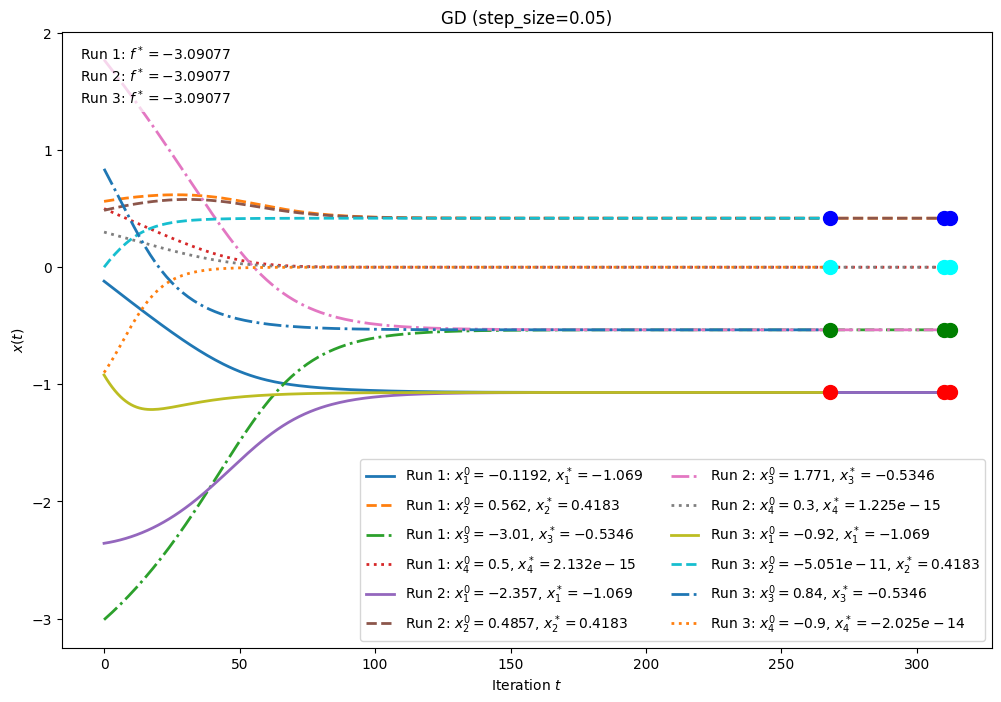

In [9]:
plot_all("GD (step_size=0.05)", results_gd_0)

# GD LR=0.1

In [10]:
results_gd_1 = []
print("===== GD results for Example 1 =====")
for i, x0 in enumerate(x0s):
    result = run_gd(x0, step_size=0.1)
    results_gd_1.append(result)
    print(f"\n--- Run {i+1} ---")
    print("Initial point:", x0)
    print("x =", result.x_opt)
    print("f(x) =", result.fun_opt)
    print("Iterations =", len(result.history))

===== GD results for Example 1 =====

--- Run 1 ---
Initial point: [ 0.5  1.8 -2.7  0.5]
x = [-1.06927985e+00  4.18299940e-01 -5.34640063e-01  1.17389426e-16]
f(x) = -3.090770042132505
Iterations = 160

--- Run 2 ---
Initial point: [-2.5  0.2  1.7  0.3]
x = [-1.06927996e+00  4.18299940e-01 -5.34639843e-01 -2.30222987e-17]
f(x) = -3.0907700421325055
Iterations = 159

--- Run 3 ---
Initial point: [ 1.   1.2  1.8 -0.9]
x = [-1.06927996e+00  4.18299940e-01 -5.34639840e-01 -1.19901208e-15]
f(x) = -3.090770042132505
Iterations = 138


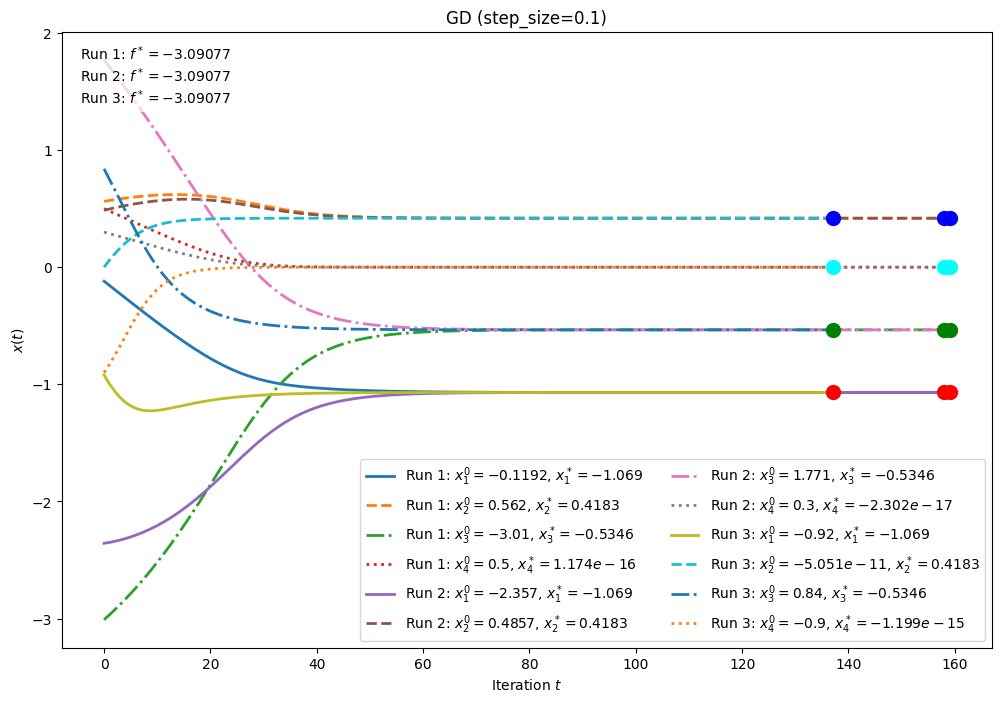

In [11]:
plot_all("GD (step_size=0.1)", results_gd_1)

# GD LR=0.2

In [12]:
results_gd_2 = []
print("===== GD results for Example 1 =====")
for i, x0 in enumerate(x0s):
    result = run_gd(x0, step_size=0.2)
    results_gd_2.append(result)
    print(f"\n--- Run {i+1} ---")
    print("Initial point:", x0)
    print("x =", result.x_opt)
    print("f(x) =", result.fun_opt)
    print("Iterations =", len(result.history))

===== GD results for Example 1 =====

--- Run 1 ---
Initial point: [ 0.5  1.8 -2.7  0.5]
x = [-1.06927988e+00  4.18299940e-01 -5.34639997e-01 -5.36325546e-18]
f(x) = -3.0907700421325126
Iterations = 80

--- Run 2 ---
Initial point: [-2.5  0.2  1.7  0.3]
x = [-1.06927993e+00  4.18299940e-01 -5.34639901e-01  1.23923297e-19]
f(x) = -3.0907700421325126
Iterations = 79

--- Run 3 ---
Initial point: [ 1.   1.2  1.8 -0.9]
x = [-1.06927993e+00  4.18299940e-01 -5.34639906e-01 -8.36740964e-17]
f(x) = -3.0907700421325126
Iterations = 69


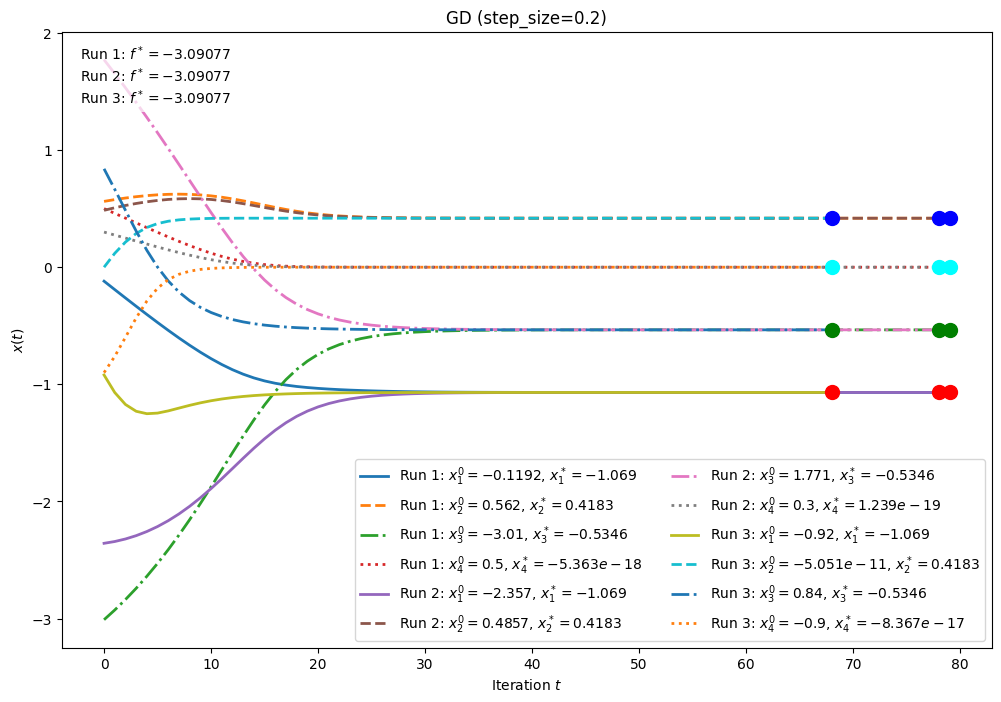

In [13]:
plot_all("GD (step_size=0.2)", results_gd_2)

# GDA

In [14]:
results_gda = []
print("===== GDA results for Example 1 =====")
for i, x0 in enumerate(x0s):
    result = run_gda(x0, 0.5, 0.1, 0.5) 
    results_gda.append(result)
    print(f"\n--- Run {i+1} ---")
    print("Initial point:", x0)
    print("x* =", result.x_opt)
    print("f(x*) =", result.fun_opt)
    print("Total iterations =", len(result.history))

===== GDA results for Example 1 =====

--- Run 1 ---
Initial point: [ 0.5  1.8 -2.7  0.5]
x* = [-1.06927987e+00  4.18299945e-01 -5.34640046e-01 -2.84476952e-17]
f(x*) = -3.0907700421325077
Total iterations = 116

--- Run 2 ---
Initial point: [-2.5  0.2  1.7  0.3]
x* = [-1.06927996e+00  4.18299943e-01 -5.34639846e-01 -6.68613382e-18]
f(x*) = -3.0907700421325055
Total iterations = 113

--- Run 3 ---
Initial point: [ 1.   1.2  1.8 -0.9]
x* = [-1.06927997e+00  4.18299946e-01 -5.34639847e-01 -1.42948689e-17]
f(x*) = -3.0907700421325064
Total iterations = 105


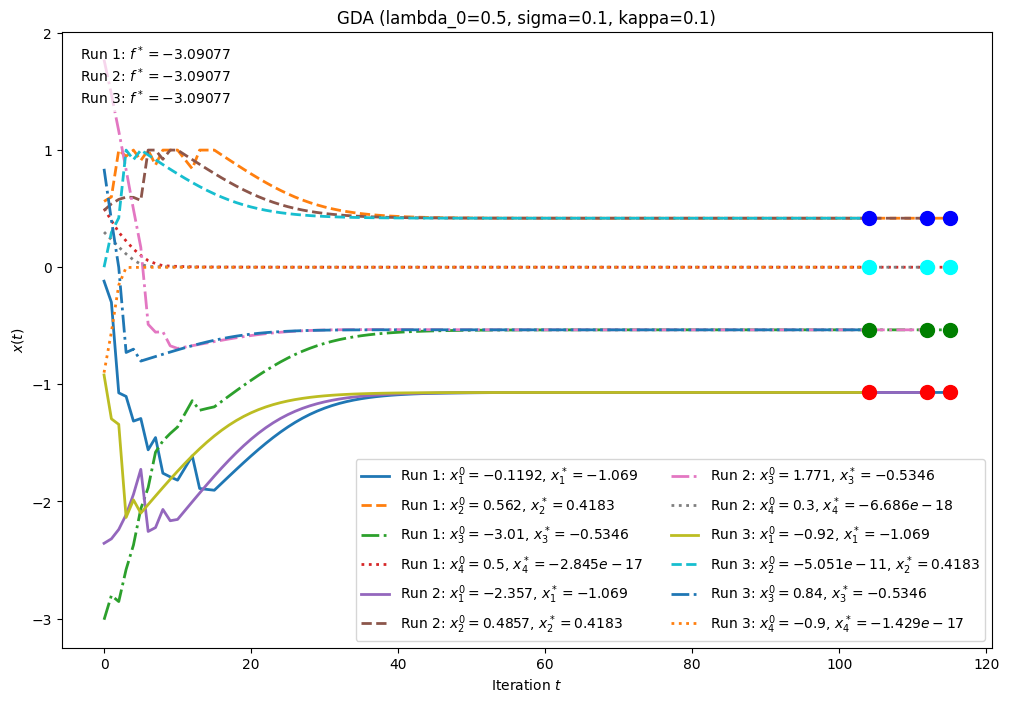

In [15]:
plot_all("GDA (lambda_0=0.5, sigma=0.1, kappa=0.1)", results_gda)